#Theoritical questions

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

->Anomaly detection means finding data points that don’t behave normally. These can indicate errors, fraud, unusual patterns, system faults, etc.

Types of Anomalies
1. Point Anomaly

A single data point is abnormal compared to the rest.
Example:
• In a list of temperatures: 30, 31, 29, 32, 90 → 90 is a point anomaly.

2. Contextual Anomaly

A value is abnormal only in a specific context (time, location, condition).
Example:
• 30°C is normal in summer but 30°C at midnight in winter is abnormal.

3. Collective Anomaly

A group of data points is abnormal together, even if each point looks normal individually.
Example:
• A sudden sequence of rapid login attempts → looks like a brute-force attack.
• Heartbeat readings that form an unusual pattern.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms
of their approach and suitable use cases.

->Isolation Forest: It isolates anomalies by randomly splitting data. Anomalies get isolated faster because they are few and different. Best for: large, high-dimensional datasets like fraud detection.

DBSCAN: It forms clusters based on density and treats points in low-density areas as outliers. Best for: spatial data or datasets with natural clusters of any shape.

Local Outlier Factor (LOF): It compares the local density of a point with its neighbors; points in lower-density areas are anomalies. Best for: detecting local or subtle anomalies, especially in smaller datasets.

Question 3: What are the key components of a Time Series? Explain each with one
example.

->Key Components of a Time Series

Trend – The long-term increase or decrease in data.
Example: A company’s yearly revenue rising steadily over 5 years.

Seasonality – Repeating patterns at regular intervals.
Example: Ice cream sales peak every summer.

Cyclic – Long-term fluctuations not of fixed period, often tied to business/economic cycles.
Example: Stock market rises and falls over several years.

Irregular/Noise – Random, unpredictable variations.
Example: A sudden spike in electricity usage due to a festival.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

->A time series is stationary if its statistical properties (mean, variance, autocorrelation) stay constant over time. Stationary series are easier to model and forecast.

Testing for Stationarity

Visual check: Plot the series and look for trends or changing variance.

Statistical tests:

ADF (Augmented Dickey-Fuller) test

KPSS test

Transforming Non-Stationary to Stationary

Differencing: Subtract the previous value from the current one.

Log/Power Transform: Reduce variance over time.

Detrending: Remove trends using regression or moving averages.

Seasonal adjustment: Remove repeating seasonal patterns.

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

->AR (AutoRegressive): Predicts a value using past values of the series.
Use: When the series depends mostly on its own previous values.

MA (Moving Average): Predicts a value using past forecast errors.
Use: When random shocks or noise influence the series.

ARIMA (AutoRegressive Integrated MA): Combines AR + MA + differencing to handle non-stationary data.
Use: Forecasting non-stationary time series with trends.

SARIMA (Seasonal ARIMA): ARIMA + seasonal components.
Use: Series with trends and seasonal patterns (e.g., monthly sales).

SARIMAX (SARIMA with exogenous variables): SARIMA + external factors (explanatory variables).
Use: Forecasting when other variables affect the series (e.g., promotions, holidays).



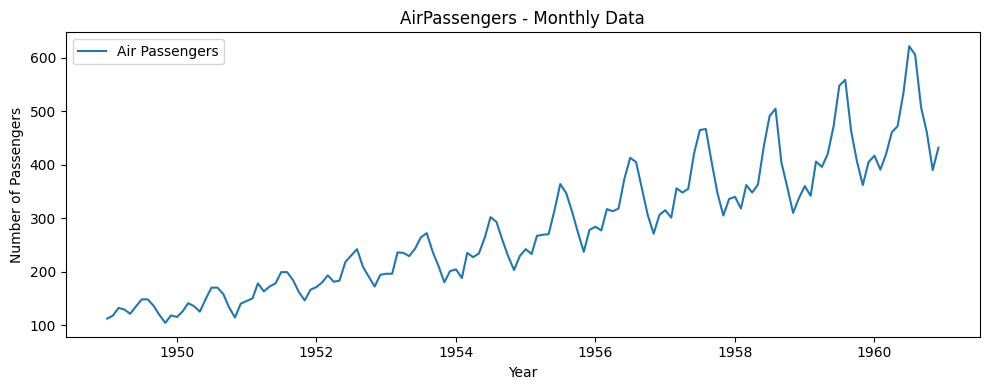

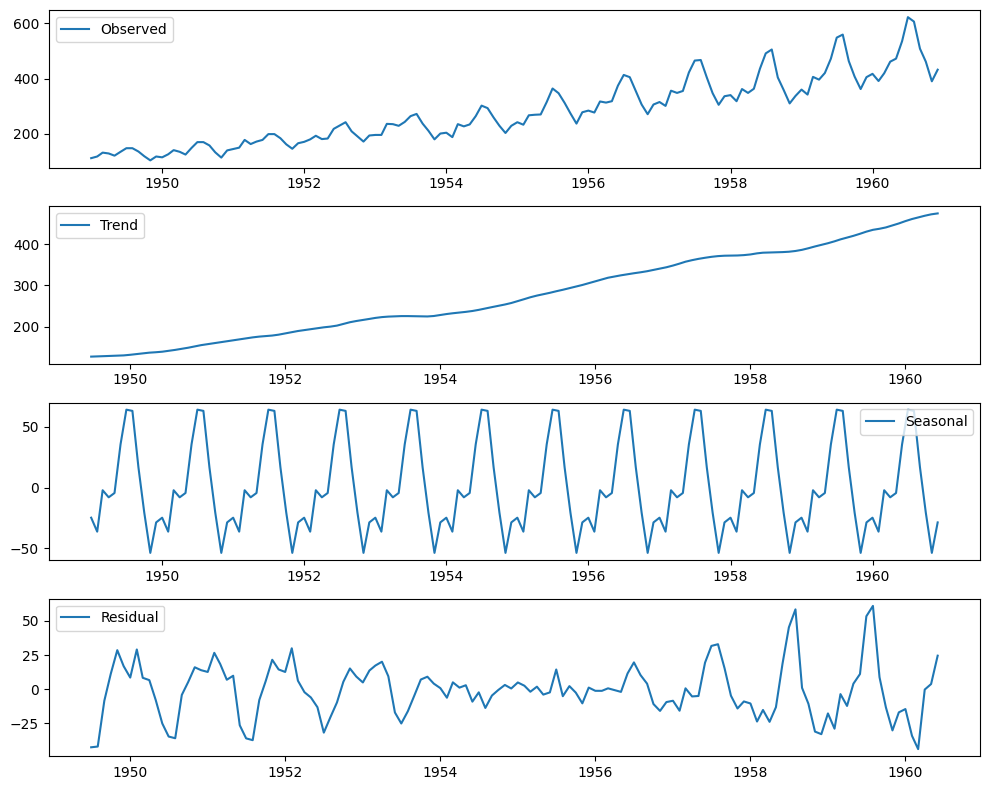

In [4]:
'''Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("AirPassengers.csv")


df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)


plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Air Passengers')
plt.title('AirPassengers - Monthly Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.tight_layout()
plt.show()


decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


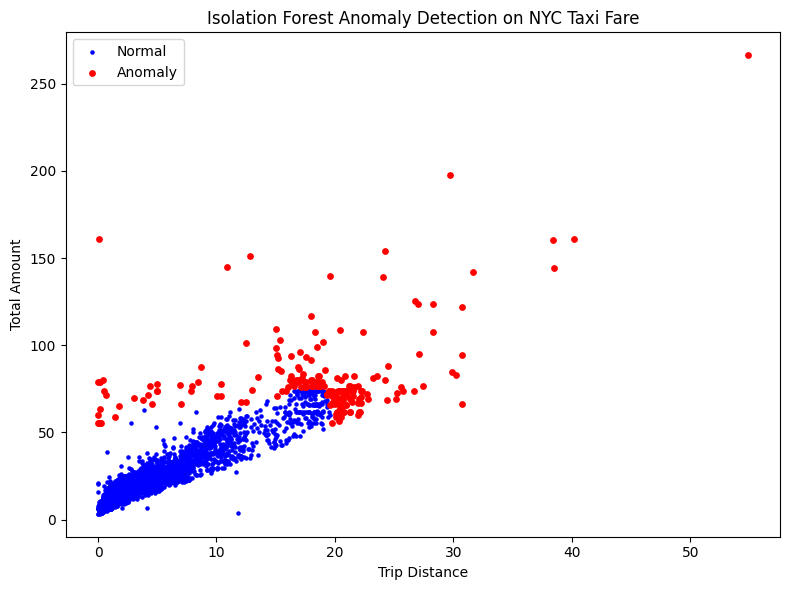

In [6]:
'''Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

df = pd.read_csv("NYC_taxi_fare_data.csv")

data = df[['trip_distance', 'total_amount']].copy()
data = data.dropna()
data = data[(data['trip_distance'] > 0) & (data['total_amount'] > 0)]
data_sample = data.sample(n=10000, random_state=42)

iso = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
iso.fit(data_sample)

labels = iso.predict(data_sample)
data_sample['anomaly'] = labels

normal = data_sample[data_sample['anomaly'] == 1]
anomaly = data_sample[data_sample['anomaly'] == -1]

plt.figure(figsize=(8, 6))
plt.scatter(normal['trip_distance'], normal['total_amount'], c='blue', s=5, label='Normal')
plt.scatter(anomaly['trip_distance'], anomaly['total_amount'], c='red', s=15, label='Anomaly')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.title('Isolation Forest Anomaly Detection on NYC Taxi Fare')
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


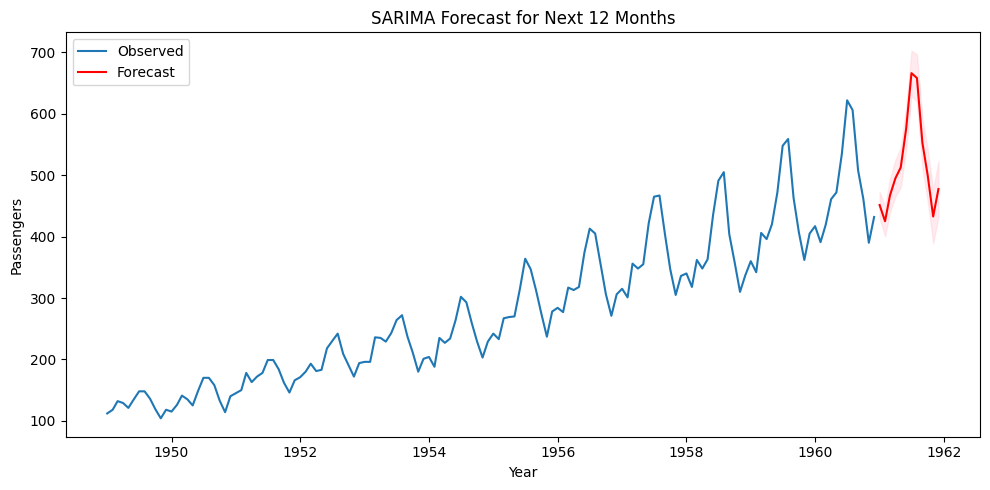

In [7]:
'''Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv("AirPassengers.csv")
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)
df.rename(columns={"#Passengers": "Passengers"}, inplace=True)

ts = df["Passengers"]

train = ts

model = SARIMAX(
    train,
    order=(0, 1, 1),
    seasonal_order=(2, 1, 1, 12)
)
results = model.fit(disp=False)

forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(
    start=train.index[-1] + pd.offsets.MonthBegin(1),
    periods=forecast_steps,
    freq="MS"
)
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
conf_int = forecast.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(train, label="Observed")
plt.plot(forecast_series, label="Forecast", color="red")
plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0].values,
    conf_int.iloc[:, 1].values,
    color="pink",
    alpha=0.3
)
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("SARIMA Forecast for Next 12 Months")
plt.legend()
plt.tight_layout()
plt.show()


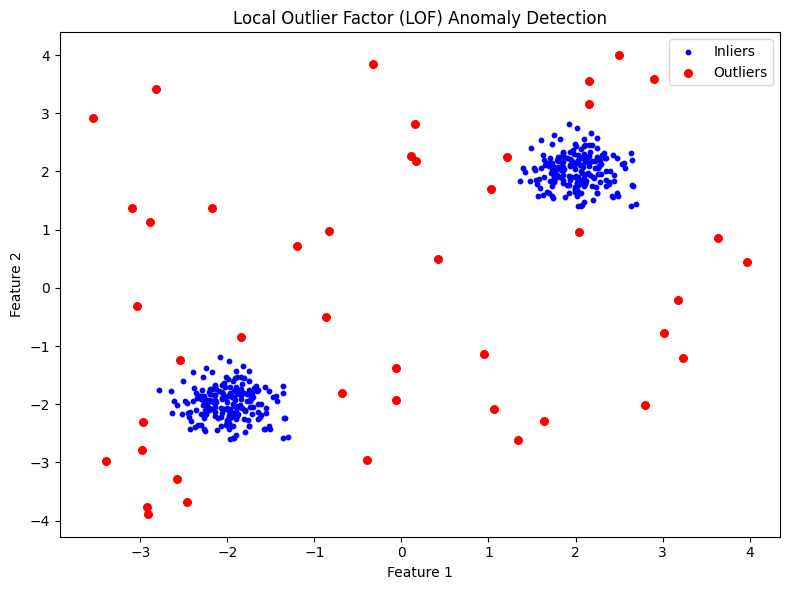

In [8]:
'''Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = 0.3 * np.random.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(40, 2))

X = np.r_[X_inliers, X_outliers]

lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1
)
y_pred = lof.fit_predict(X)

inliers = X[y_pred == 1]
outliers = X[y_pred == -1]

plt.figure(figsize=(8, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c="blue", s=10, label="Inliers")
plt.scatter(outliers[:, 0], outliers[:, 1], c="red", s=30, label="Outliers")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?


->Anomaly Detection: Apply Isolation Forest or LOF on streaming 15-minute energy usage data. Isolation Forest isolates unusual patterns in high-dimensional data (region, weather, usage), while LOF identifies local deviations compared to similar conditions. Anomalies can trigger real-time alerts for spikes or drops.

Forecasting: Use SARIMAX for short-term predictions. It captures trends, daily/weekly seasonality, and incorporates external factors like weather or region. This helps forecast energy demand for the next few hours accurately.

Validation & Monitoring: Perform rolling-window backtesting using metrics like MAE, RMSE, or MAPE. Monitor forecast errors and anomaly rates over time to detect model drift. Retrain the model as consumption patterns or seasonal trends change.

Business Impact: Real-time anomaly detection prevents overloads or blackouts. Short-term forecasts guide energy generation and distribution planning. Insights support dynamic pricing, maintenance scheduling, and overall cost-efficient operations.
